In [0]:
# initilizing pckages

import pandas as pd
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt
import requests


In [0]:
# Saving the links in variables

confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
death_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [0]:
# reading the csv files from the links

df_confirmed = pd.read_csv(confirmed_cases_url)
df_recovered = pd.read_csv(recovered_cases_url)
df_deaths = pd.read_csv(death_cases_url)

In [0]:
# viewing the first five lines

df_confirmed.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16


In [0]:
# To check the shape(no of rows and columns) of data

df_confirmed.shape

(263, 80)

In [0]:
# checking the name of columes here 80 columns

df_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20'],
      dtype='object')

In [0]:
# melting the additonal columns except (state,country,lat,long) in to one column

df_confirmed.melt(id_vars=['Province/State','Country/Region','Lat','Long'])

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.00000,65.000000,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0
...,...,...,...,...,...,...
19983,Falkland Islands (Islas Malvinas),United Kingdom,-51.79630,-59.523600,4/6/20,2
19984,Saint Pierre and Miquelon,France,46.88520,-56.315900,4/6/20,1
19985,NaN,South Sudan,6.87700,31.307000,4/6/20,1
19986,NaN,Western Sahara,24.21550,-12.885800,4/6/20,4


In [0]:
# changing the "variable" column to Date and there value to confirm, death and recovered according to respective dataset

confirm_df = df_confirmed.melt(id_vars=['Province/State','Country/Region','Lat','Long'])
confirm_df.rename(columns={'variable':'Date','value':'Confirmed'},inplace=True)

recovered_df = df_recovered.melt(id_vars=['Province/State','Country/Region','Lat','Long'])
recovered_df.rename(columns={'variable':'Date','value':'Recovered'},inplace=True)

deaths_df = df_deaths.melt(id_vars=['Province/State','Country/Region','Lat','Long'])
deaths_df.rename(columns={'variable':'Date','value':'Deaths'},inplace=True)

In [0]:
# Viewing the last five rows

confirm_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
19983,Falkland Islands (Islas Malvinas),United Kingdom,-51.79630,-59.523600,4/6/20,2
19984,Saint Pierre and Miquelon,France,46.88520,-56.315900,4/6/20,1
19985,NaN,South Sudan,6.87700,31.307000,4/6/20,1
19986,NaN,Western Sahara,24.21550,-12.885800,4/6/20,4
19987,NaN,Sao Tome and Principe,0.18636,6.613081,4/6/20,4


In [0]:
# creating a function for melting

def get_n_melt_data(data_url,case_type):
  df = pd.read_csv(data_url)
  melted_df = df.melt(id_vars=['Province/State','Country/Region','Lat','Long'])
  melted_df.rename(columns={'variable':'Date','value':'Deaths'},inplace=True)
  return melted.df

In [0]:
# viewing first five rows of recovered dataset to see changes got effective or not

recovered_df.head()

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [0]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [0]:
confirm_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [0]:
# joining all three dataset in to one

final_df = confirm_df.join(recovered_df["Recovered"]).join(deaths_df["Deaths"])


In [0]:
final_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
19983,Falkland Islands (Islas Malvinas),United Kingdom,-51.79630,-59.523600,4/6/20,2,NaN,0
19984,Saint Pierre and Miquelon,France,46.88520,-56.315900,4/6/20,1,NaN,0
19985,NaN,South Sudan,6.87700,31.307000,4/6/20,1,NaN,0
19986,NaN,Western Sahara,24.21550,-12.885800,4/6/20,4,NaN,0
19987,NaN,Sao Tome and Principe,0.18636,6.613081,4/6/20,4,NaN,0


In [0]:
# plotting the points according to country long and lat

gdf01 =gpd.GeoDataFrame(final_df,geometry = gpd.points_from_xy(final_df['Long'],final_df['Lat']))

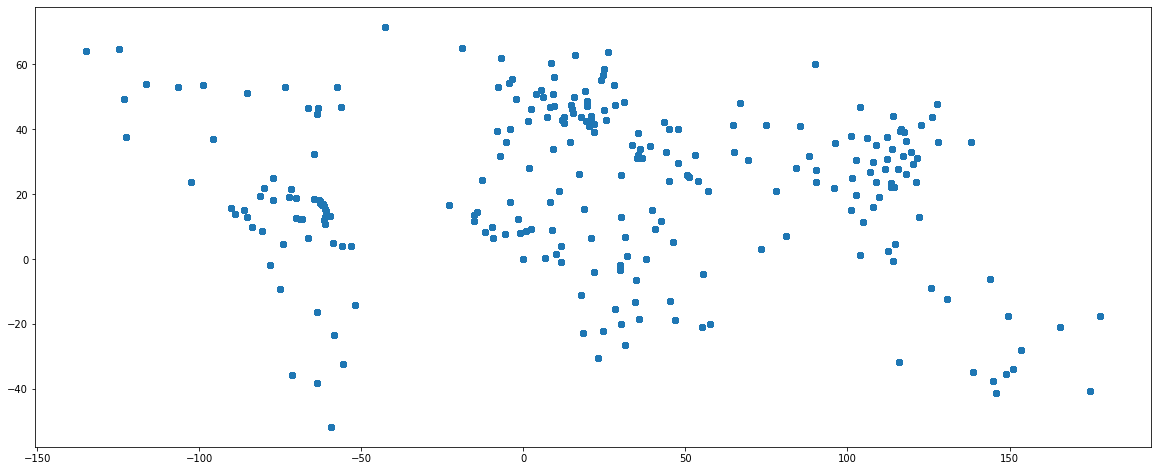

In [0]:
gdf01.plot(figsize=(20,10))

In [0]:
# loading the world map form geopandas  

world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres'))

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

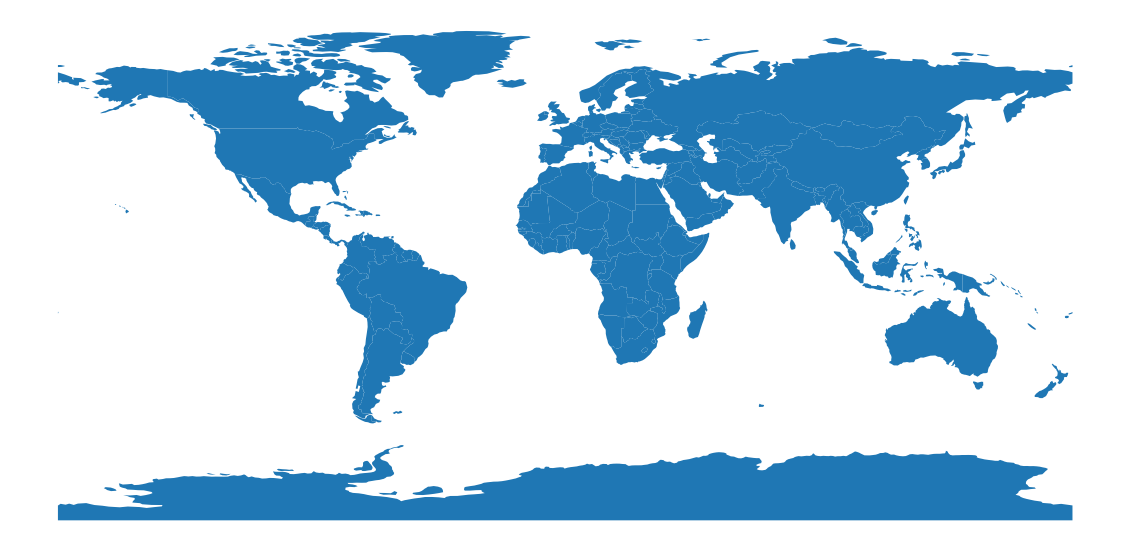

In [0]:
ax = world.plot(figsize=(20,10))

# removing the axis... 

ax.axis('off')

(-198.0, 198.0, -98.68225649999998, 92.3273865)

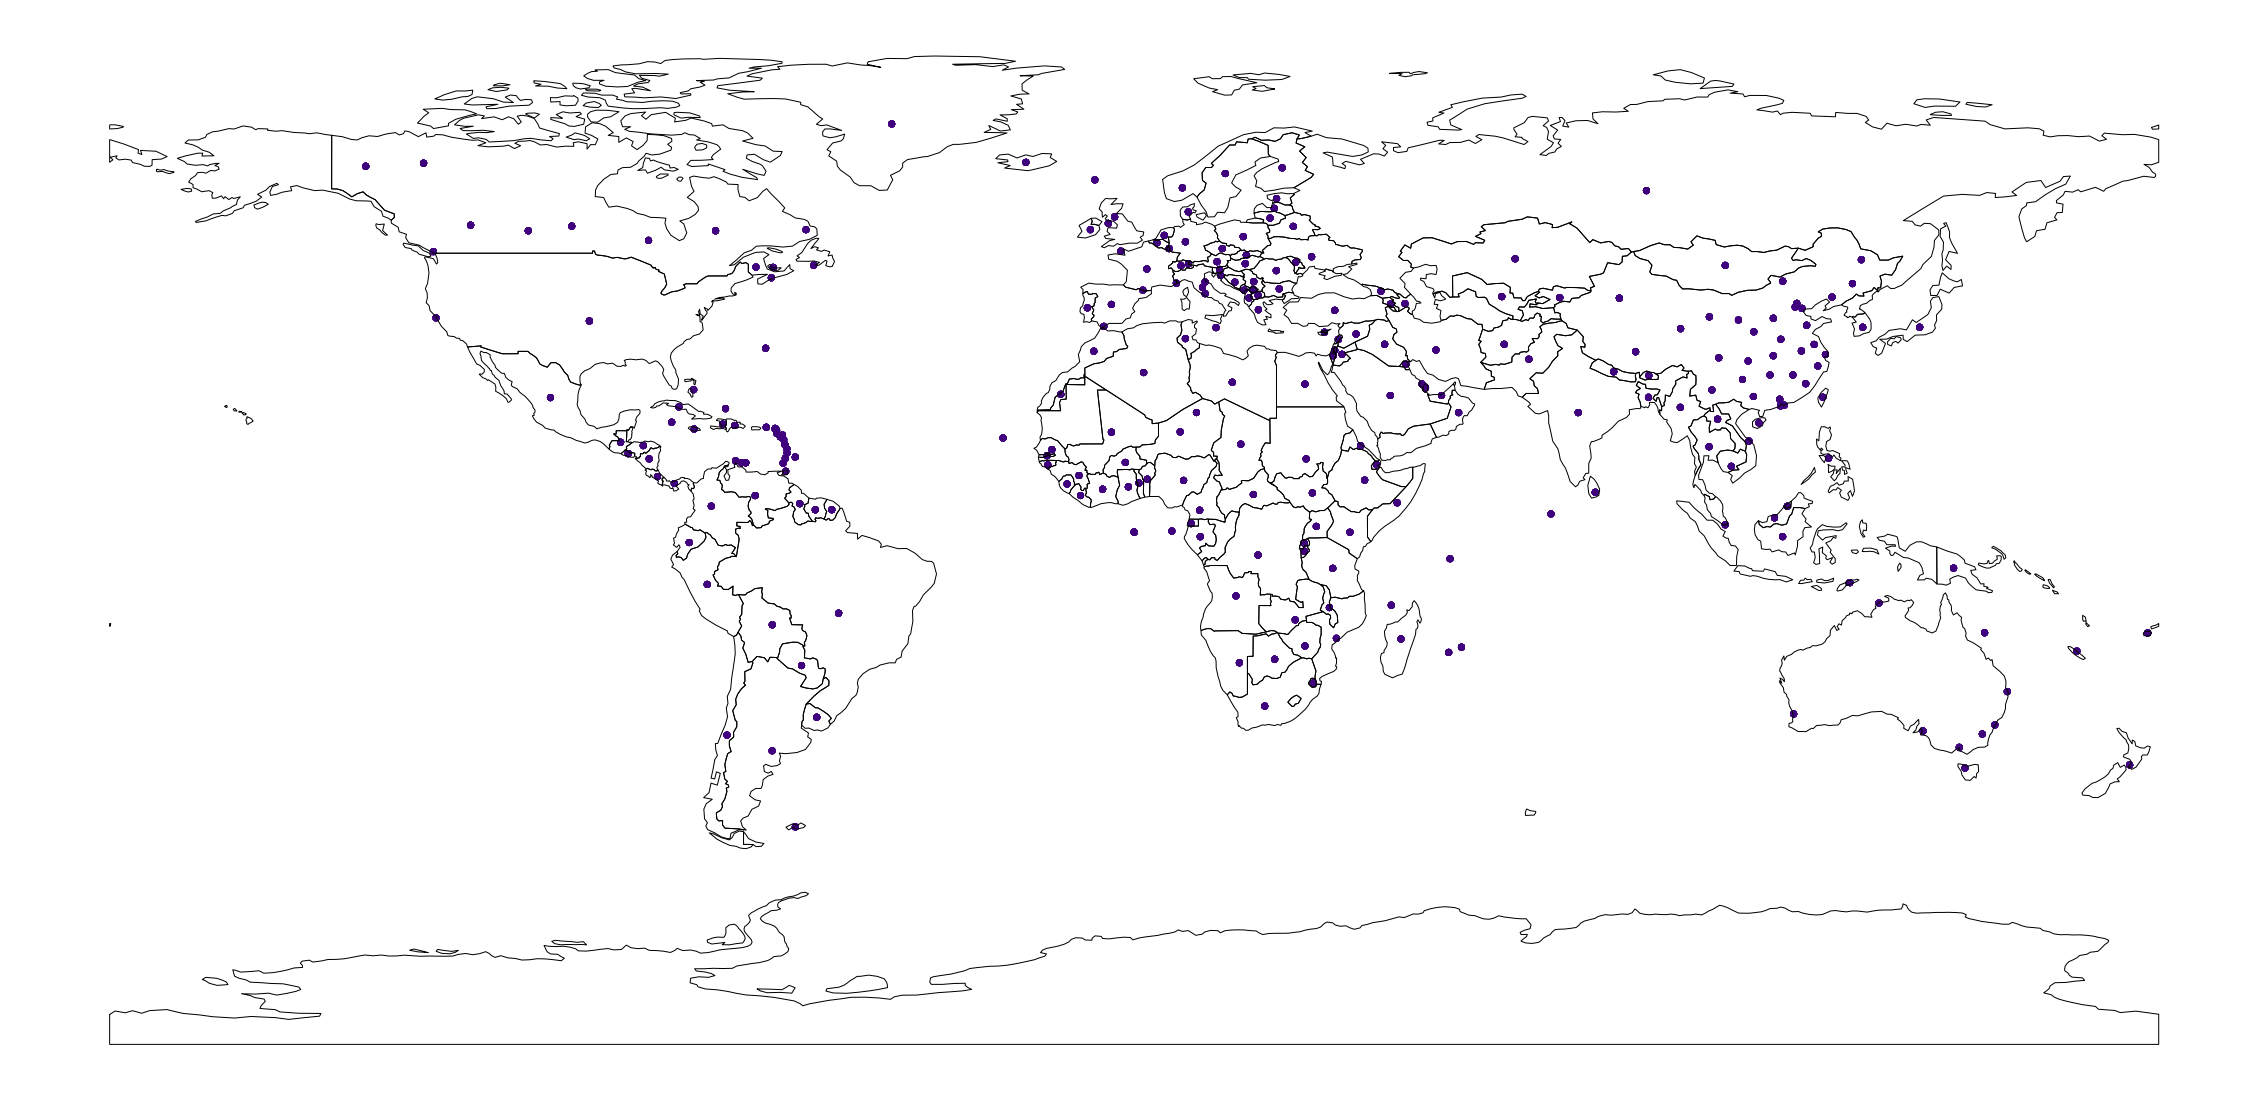

In [0]:
# merging the points into worldmap

fig,ax =plt.subplots(figsize=(50,20))
gdf01.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=1,ax=ax)
ax.axis('off')